# In-depth Analysis (Applying Machine Learning)

## Step 1) Read the Manual

Before we progress further, we display the information about the dataset that we obtained from the dataset manual, that is, from Kaggle and the UCI Machine Learning Repository.

From Kaggle, an overview of the variables:

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

And from UCI:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Potential issue: We'll want to group values 5 and 6 for Education into one value (looking at the Kaggle description) since they both stand for "unknown". And perhaps we'll want to include 4 in that grouping since it has the value of "others".

## Step 2) Review the Data Types

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
import sklearn

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
filename = 'UCI_Credit_Card.csv'

In [3]:
data = pd.read_csv(filename) #, index_col=0)
data = data.drop(columns='ID') # don't need ID column, because just the index + 1

In [4]:
pd.set_option('display.max_columns', 500)
data.sample(5).T

,9135,16937,22418,2043,2830
LIMIT_BAL,240000.0,20000.0,350000.0,50000.0,220000.0
SEX,1.0,1.0,2.0,2.0,1.0
EDUCATION,2.0,3.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,1.0,2.0,1.0
AGE,54.0,59.0,36.0,28.0,32.0
PAY_0,0.0,2.0,0.0,0.0,0.0
PAY_2,0.0,2.0,0.0,0.0,0.0
PAY_3,2.0,2.0,0.0,0.0,0.0
PAY_4,0.0,2.0,0.0,0.0,0.0
PAY_5,0.0,4.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

All columns in this dataset have a numeric type. They are either float-valued (continuous) or int-valued (discrete). Nothing seems to be off, so we may continue.

In [6]:
display(data.shape)

(30000, 24)

## Step 3) Fixing the Issues (Data Cleaning):

### Problem 1: Get rid of Bad Column Names


In [7]:
## Rename columns
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

### Problem 2: Replace Negative Values with 0 in Pay_X columns

To deal with with values for the PAY_X columns that shouldn't exist, a sensible solution is to convert all non-positive values to 0. The dataset description says that a value of -1 means "pay duly" and positive values represent a payment delay by that number of months. Therefore, converting -1 and -2 values to 0, and having 0 represent "pay duly" is logical.

In [8]:
for i in range(1,7):
    data.loc[data["PAY_" + str(i)] < 0, "PAY_" + str(i)] = 0

### Problem 3: Get rid of Values of 0 for Marriage

A logical move is to group the 0 values with the "Other" values, coded as 3, so that is what we'll do:


In [9]:
data.loc[data["MARRIAGE"] == 0, 'MARRIAGE'] = 3

"Other" for marriage can possibly refer to divorced, widowed, seperated, etc.

### Problem 4: Get rid of 0 Values for Education

Currently coded as:
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

We see that 0 is not even in the dataset desciption, and we have 2 values for unknown. So a logical move is to convert the 0, 5 and 6 values to 4, which is what we'll do. "Other" can  refer to education less than high school or perhaps vocational training.

In [10]:
replace = (data["EDUCATION"] == 0) | (data["EDUCATION"] == 5) | (data["EDUCATION"] == 6) 
data.loc[replace,'EDUCATION'] = 4

## Step 4) Analysis

### Steps Involved in Classification in Scikit-Learn

1. Preprocess Data
2. Create Train and Test Sets
3. Instantiate the model/estimator  
(Steps 1 and 3 can be combined in a Pipeline object)
4. Specify Hyperparameter Space
5. Instantiate GridSearchCV or RandomizedSearchCV objects
6. Fit CV object to the Training Set
7. Predict on the Test Set
8. Compute Scores for the Model

*Models*:
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Trees (DT)
5. Random Forest (RF)
6. Naive Bayes

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, scale, StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
from scipy.stats import randint
import time

In [12]:
#### Step 1) Preprocess Data

# We will train our classifier with the following features:
# Numeric features to be scaled: LIMIT_BAL, AGE, PAY_X, BIL_AMTX, and PAY_AMTX
# Categorical features: SEX, EDUCATION, MARRIAGE

# We create the preprocessing pipelines for both numeric and categorical data
numeric_features = ['LIMIT_BAL', 'AGE',  
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
                   ]



# data['PAY_1'] = data.PAY_1.astype('float64')
# data['PAY_2'] = data.PAY_2.astype('float64')
# data['PAY_3'] = data.PAY_3.astype('float64')
# data['PAY_4'] = data.PAY_4.astype('float64')
# data['PAY_5'] = data.PAY_5.astype('float64')
# data['PAY_6'] = data.PAY_6.astype('float64')
data['AGE'] = data.AGE.astype('float64')

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
])

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        #,('lab', label_transformer, label_features)
    ])

In [14]:
#### Step 2) Split Data into Training and Test Sets

y = data['default']#.values
X = data.drop(['default'], axis=1)#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

Before we proceed further, we prepare a dataframe the will store the different scoring metrics that we will score each model with:

In [15]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['Dummy Model', 'LR', 'KNN', 'SVM', 'DT', 'RF'])

General Definitions of accuracy, precision, and recall (from https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/):
- **Accuracy**: a ratio of correctly predicted observation to the total observations
- **Precision**: the ratio of correctly predicted positive observations to the total predicted positive observations
- **recall**: the ratio of correctly predicted positive observations to all observations in actual class 

Using "positive class" to mean 'defaulters', we get:
- **Accuracy**: a ratio of correctly predicted defaulters and non-defaulters to the number of all customers
- **Precision**: the ratio of correctly predicted defaulters to the total number of predicted defaulters
- **Recall**: the ratio of correctly predicted defaulters to the number of actual defaulters

What do we care more about?
- **False positive**: A person who won't default that we predict will default
- **False negative**:A person who will default that we predict won't default

Since we stand to lose significant money if we predict default won't happen and it does, and we only inconvenience the customer if we think they will default when they won't, we should care more about false negatives than false positive. Since a higher recall minimizes false negatives wheras a higher precision minimizes false positives, we should care more about maximizing recall than maximizing precision (or maximizing accuracy).

Let's create a dumb model that always predicts 0 (no-default) so we can see how well our model actually does.

##### *Base Model: Dummy Model*

In [16]:
#### Step 3: Instantiate the Estimator

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
from sklearn.dummy import DummyClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DummyClassifier(strategy="most_frequent"))])

## We can skip steps 4 and 5 since we have no hyperparameters to tune since this is a dummy model where we always predict 
## the most common lable (no default)

#### Step 6: Fit on Training

t0 = time.time()
model.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes ", ttt, " seconds for Dumb Classifier fitting")
metrics.loc['Time to Train', 'Dummy Model'] = ttt


#### Step 7: Predict on Test

y_pred = model.predict(X_test)

#### Step 8: Scoring

##### Accuracy

print("Accuracy with LR on testing set is: %.3f" % model.score(X_test, y_test))
# Latest accuracy is 0.779

metrics.loc['accuracy', 'Dummy Model'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'Dummy Model'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'Dummy Model'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = model.predict_proba(X_test)[:,1]

metrics.loc['AUC', 'Dummy Model'] = roc_auc_score(y_test, y_pred_prob)


def Conf_Matrix(CM, labels=['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


It takes  0.04487895965576172  seconds for Dumb Classifier fitting
Accuracy with LR on testing set is: 0.779
PREDICTION   pay  default  Total
TRUE                            
pay         7009        0   7009
default     1991        0   1991
Total       9000        0   9000
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



C:\Users\gideo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gideo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gideo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gideo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### *1st Model: Logistic Regression*

It takes 77.851  seconds for Logistic Regression fitting
Accuracy with lr on testing set is: 0.824
PREDICTION   pay  default  Total
TRUE                            
pay         6687      322   7009
default     1259      732   1991
Total       7946     1054   9000
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.69      0.37      0.48      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



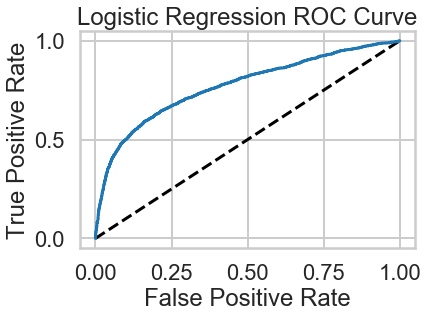

In [17]:
#### Step 3: Instantiate the Estimator

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(solver='liblinear', random_state=21))])

#### Step 4: Specify the Hyperparameter Space

param_grid_lr = {
    
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}

#### Step 5: Instantiate the CV Object

lr_cv = GridSearchCV(lr, param_grid_lr, cv=5, iid=False)

#### Step 6: Fit on Training

t0 = time.time()
lr_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for Logistic Regression fitting")
metrics.loc['Time to Train', 'LR'] = ttt

#### Step 7: Predict on Test

y_pred = lr_cv.predict(X_test)

#### Step 8: Scoring

##### Accuracy

print("Accuracy with lr on testing set is: %.3f" % lr_cv.score(X_test, y_test))
# Latest accuracy is 0.82

metrics.loc['accuracy', 'LR'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'LR'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'LR'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = lr_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'LR'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

*Area under the Curve*

In [18]:
roc_auc_score(y_test, y_pred_prob)

0.7707402314553027

So by comparing our model to the dumb model by precision and f1-score in addition to simple recall, we see that our model is in fact a substantial improvement. Weighted precision increases by 0.2, and the weighted f1-score by 0.12. 

###### Best parameters

In [19]:
print("mean cross-validated score of the best_estimator: %.3f " % lr_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: C = %.3f" % lr_cv.best_params_.get('classifier__C'))
print("Parameter setting that gave the best results on the hold out data: penalty =", lr_cv.best_params_.get('classifier__penalty'))

mean cross-validated score of the best_estimator: 0.818 
Parameter setting that gave the best results on the hold out data: C = 11787686.348
Parameter setting that gave the best results on the hold out data: penalty = l2


In [20]:
coefs = lr_cv.best_estimator_.named_steps['classifier'].coef_
print("Total Number of Features:", coefs.size)
print(" Number of Selected Features:", np.count_nonzero(coefs))

Total Number of Features: 74
 Number of Selected Features: 74


###### Feature Engineering

Looking at records with low probability of default, but that default:

In [21]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

if ('prob_of_default' in train_data):
    train_data = train_data.drop(columns=['prob_of_default'])
if ('prob_of_default' in test_data):
    test_data = test_data.drop(columns=['prob_of_default'])

probs_train = lr_cv.predict_proba(X_train)[:,1] # probs = probability of default
probs_test = lr_cv.predict_proba(X_test)[:,1] # probs = probability of default

train_data['prob_of_default'] = probs_train
test_data['prob_of_default'] = probs_test

train_data['train/test'] = 'train'
test_data['train/test'] = 'test'

new_data = train_data.append(test_data).sort_index()

In [22]:
train_ranked = new_data.loc[new_data['train/test'] == 'train'].sort_values(by='prob_of_default')
test_ranked = new_data.loc[new_data['train/test'] == 'test'].sort_values(by='prob_of_default')

These guys in the training set default with a low probability of default:

In [23]:
train_ranked.loc[(train_ranked.prob_of_default < 0.5) & (train_ranked.default == 1)].head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prob_of_default,train/test
18967,480000.0,2,2,2,30.0,0,0,0,0,0,0,470400.0,0.0,0.0,0.0,0.0,330982.0,0.0,0.0,0.0,0.0,330982.0,30000.0,1,0.00883,train


1. Individual 18967 defaults with an assigned default probability of about 1%. This seems to have happened because she had a very large bill statement in September, just before the bankruptcy point. One takeaway then is to look at all customers with large bills in September and see how many default. 

In [24]:
train_ranked.loc[(train_ranked.PAY_1 == 0 ) & (train_ranked.BILL_AMT1 > 0)].default.mean()

0.136935318275154

It's not the case that customers with PAY_1 = 0 and BILL_AMT1 > 0 default more than the average. Actually, they default less than the average. What about if we also factor in PAY_AMT1?

In [25]:
train_ranked.loc[(train_ranked.PAY_1 == 0 ) & (train_ranked.BILL_AMT1 > 0) & (train_ranked.PAY_AMT1 == 0)].default.mean()

0.2199248120300752

Definately higher, but only about the mean now. Can't create rule based on this.

In [26]:
train_ranked.corr()['prob_of_default'].sort_values(ascending=False)

prob_of_default    1.000000
PAY_1              0.863029
PAY_2              0.717395
PAY_3              0.620480
PAY_4              0.569325
PAY_5              0.553851
PAY_6              0.529636
default            0.448361
EDUCATION          0.072890
AGE                0.029637
BILL_AMT6         -0.012711
BILL_AMT5         -0.014154
BILL_AMT4         -0.023444
BILL_AMT3         -0.027448
BILL_AMT2         -0.027862
BILL_AMT1         -0.038587
MARRIAGE          -0.057828
SEX               -0.076356
PAY_AMT6          -0.111737
PAY_AMT4          -0.120900
PAY_AMT5          -0.123392
PAY_AMT2          -0.123649
PAY_AMT3          -0.141162
PAY_AMT1          -0.170352
LIMIT_BAL         -0.327910
Name: prob_of_default, dtype: float64

Probability of default is most highly correlated with repayment status, with stength of correlation increasing with time. Makes sense.

#### 2nd Model: KNN

It takes 278.351  seconds for KNN fitting
Accuracy with KNN on the test set is: 0.819
PREDICTION   pay  default  Total
TRUE                            
pay         6730      279   7009
default     1350      641   1991
Total       8080      920   9000
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.70      0.32      0.44      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



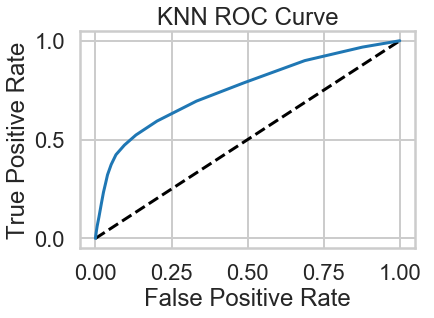

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#3
knn = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', KNeighborsClassifier())])
#4
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1,20)
}

#5
knn_cv = RandomizedSearchCV(knn, param_grid_knn, cv=3, iid=False)

#6
t0 = time.time()
knn_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for KNN fitting")
metrics.loc['Time to Train', 'KNN'] = ttt

#7
y_pred = knn_cv.predict(X_test)

#8
print("Accuracy with KNN on the test set is: %.3f" % knn_cv.score(X_test, y_test))
# latest accuracy is 0.81

metrics.loc['accuracy', 'KNN'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'KNN'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'KNN'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'KNN'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

###### Best parameters

In [28]:
print("mean cross-validated score of the best_estimator: %.3f " % knn_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: n_neighbors =", knn_cv.best_params_.get('classifier__n_neighbors'))

mean cross-validated score of the best_estimator: 0.812 
Parameter setting that gave the best results on the hold out data: n_neighbors = 18


#### 3nd Model: Support Vector Machine

In [29]:
from sklearn.svm import SVC
#3
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC())])
#4
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}

#5
svm_cv = RandomizedSearchCV(svm, param_grid_svm, cv=3, iid=False)

#6
t0 = time.time()
svm_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for SVM fitting")
metrics.loc['Time to Train', 'SVM'] = ttt

#7
y_pred = svm_cv.predict(X_test)

#8
print("Accuracy with SVM on the test set is: %.3f" % svm_cv.score(X_test, y_test))

metrics.loc['accuracy', 'SVM'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'SVM'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'SVM'] = recall_score(y_pred=y_pred, y_true=y_test)

# SVC class doesn't have a predict_proba method
# y_pred_prob = svm_cv.predict_proba(X_test)[:,1]
# metrics.loc['AUC', 'SVM'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# No ROC Curve because no predict_proba method
# ROC Curve
# fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
# plt.plot([0,1], [0,1], 'k--')
# plt.plot(fpr, tpr, label='SVM')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC Curve')
# plt.show()

It takes 971.990  seconds for SVM fitting
Accuracy with SVM on the test set is: 0.824
PREDICTION   pay  default  Total
TRUE                            
pay         6738      271   7009
default     1316      675   1991
Total       8054      946   9000
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.71      0.34      0.46      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.78      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



###### Best parameters

In [30]:
print("mean cross-validated score of the best_estimator: %.3f " % svm_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: C =", svm_cv.best_params_.get('classifier__C'))
print("Parameter setting that gave the best results on the hold out data: gamma =", svm_cv.best_params_.get('classifier__gamma'))

mean cross-validated score of the best_estimator: 0.818 
Parameter setting that gave the best results on the hold out data: C = 0.1
Parameter setting that gave the best results on the hold out data: gamma = 0.1


#### 4th Model: Decision Tree

It takes 9.830  seconds for dt fitting
Accuracy with dt on the test set is: 0.811
PREDICTION   pay  default  Total
TRUE                            
pay         6679      330   7009
default     1371      620   1991
Total       8050      950   9000
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.65      0.31      0.42      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



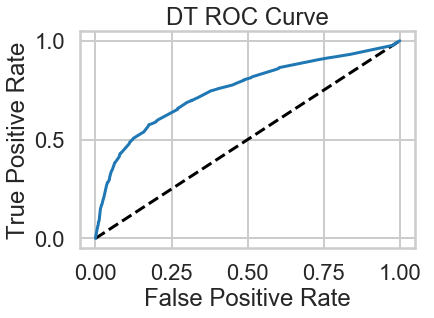

In [31]:
# Import necessary modules 
from sklearn.tree import DecisionTreeClassifier

#3
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier(random_state=21))])
#4
# Setup the parameters and distributions to sample from: param_dist
param_grid_dt = {'classifier__max_depth': [3, 10, 20, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__min_samples_split': randint(2, 9),
                'classifier__criterion': ["gini", "entropy"]}

#5
dt_cv = RandomizedSearchCV(dt, param_grid_dt, cv=10, iid=False)

#6
t0 = time.time()
dt_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for dt fitting")
metrics.loc['Time to Train', 'DT'] = ttt

#7
y_pred = dt_cv.predict(X_test)

#8
print("Accuracy with dt on the test set is: %.3f" % dt_cv.score(X_test, y_test))

metrics.loc['accuracy', 'DT'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'DT'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'DT'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = dt_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'DT'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
plt.show()

##### Best parameters

In [32]:
print("mean cross-validated score of the best_estimator: %.3f " % dt_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: max_depth =", dt_cv.best_params_.get('classifier__max_depth'))
print("Parameter setting that gave the best results on the hold out data: max_features =", dt_cv.best_params_.get('classifier__max_features'))
print("Parameter setting that gave the best results on the hold out data: min_samples_leaf =", dt_cv.best_params_.get('classifier__min_samples_leaf'))
print("Parameter setting that gave the best results on the hold out data: min_samples_split =", dt_cv.best_params_.get('classifier__min_samples_split'))
print("Parameter setting that gave the best results on the hold out data: criterion =", dt_cv.best_params_.get('classifier__criterion'))

mean cross-validated score of the best_estimator: 0.809 
Parameter setting that gave the best results on the hold out data: max_depth = 10
Parameter setting that gave the best results on the hold out data: max_features = 8
Parameter setting that gave the best results on the hold out data: min_samples_leaf = 4
Parameter setting that gave the best results on the hold out data: min_samples_split = 3
Parameter setting that gave the best results on the hold out data: criterion = entropy


#### 5th Model: RandomForest

In [33]:
#%run import_data.py

In [36]:
#%run -i std_preprocessing_and_splitting.py

It takes 125.211  seconds for rf fitting
Accuracy with RF on the test set is: 0.825
PREDICTION   pay  default  Total
TRUE                            
pay         6690      319   7009
default     1260      731   1991
Total       7950     1050   9000
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.70      0.37      0.48      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



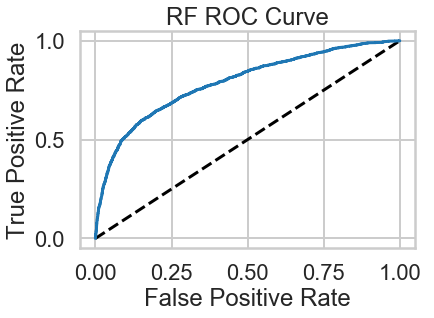

In [37]:
# Import necessary modules 

from sklearn.ensemble import RandomForestClassifier

#3
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier())])
#4
# Setup the parameters and distributions to sample from: param_dist
param_grid_rf = {'classifier__n_estimators': [50, 100],
                'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
                }

#5
rf_cv = RandomizedSearchCV(rf, param_grid_rf, cv=10, iid=False)

#6
t0 = time.time()
rf_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for rf fitting")
metrics.loc['Time to Train', 'RF'] = ttt

#7
y_pred = rf_cv.predict(X_test)

#8
print("Accuracy with RF on the test set is: %.3f" % rf_cv.score(X_test, y_test))

metrics.loc['accuracy', 'RF'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'RF'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'RF'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = rf_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'RF'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve')
plt.show()

##### Best Parameters

In [38]:
print("mean cross-validated score of the best_estimator: %.3f " % rf_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: n_estimators =", rf_cv.best_params_.get('classifier__n_estimators'))
print("Parameter setting that gave the best results on the hold out data: max_depth =", rf_cv.best_params_.get('classifier__max_depth'))
print("Parameter setting that gave the best results on the hold out data: max_features =", rf_cv.best_params_.get('classifier__max_features'))
print("Parameter setting that gave the best results on the hold out data: min_samples_leaf =", rf_cv.best_params_.get('classifier__min_samples_leaf'))
print("Parameter setting that gave the best results on the hold out data: min_samples_split =", rf_cv.best_params_.get('classifier__min_samples_split'))
print("Parameter setting that gave the best results on the hold out data: criterion =", rf_cv.best_params_.get('classifier__criterion'))

mean cross-validated score of the best_estimator: 0.818 
Parameter setting that gave the best results on the hold out data: n_estimators = 100
Parameter setting that gave the best results on the hold out data: max_depth = 10
Parameter setting that gave the best results on the hold out data: max_features = 7
Parameter setting that gave the best results on the hold out data: min_samples_leaf = 5
Parameter setting that gave the best results on the hold out data: min_samples_split = 8
Parameter setting that gave the best results on the hold out data: criterion = entropy


#### 6th Model: Naive Bayes

It takes 0.062  seconds for nb fitting
Accuracy with nb on the test set is: 0.806
PREDICTION   pay  default  Total
TRUE                            
pay         6798      211   7009
default     1537      454   1991
Total       8335      665   9000
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.68      0.23      0.34      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



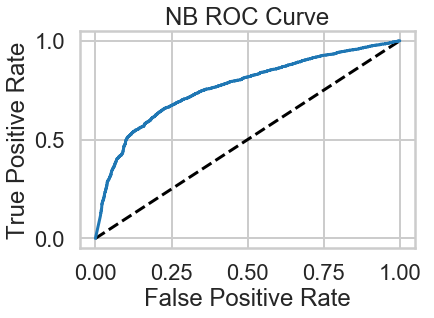

In [39]:
# Import necessary modules 

from sklearn.naive_bayes import GaussianNB

#3
nb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', GaussianNB())])

#6
t0 = time.time()
nb.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for nb fitting")
metrics.loc['Time to Train', 'NB'] = ttt

#7
y_pred = nb.predict(X_test)

#8
print("Accuracy with nb on the test set is: %.3f" % nb.score(X_test, y_test))

metrics.loc['accuracy', 'NB'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'NB'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'NB'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = nb.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'NB'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB ROC Curve')
plt.show()

**Comparing the Models**

In [55]:
from pandas.plotting import table

In [40]:
metrics.astype(float).round(3)

,Dummy Model,LR,KNN,SVM,DT,RF,NB
accuracy,0.779,0.824,0.819,0.824,0.811,0.825,0.806
precision,0.000,0.694,0.697,0.714,0.653,0.696,0.683
recall,0.000,0.368,0.322,0.339,0.311,0.367,0.228
AUC,0.500,0.771,0.753,NaN,0.749,0.789,0.765
Time to Train,0.045,77.851,278.351,971.990,9.830,125.211,0.062


In [41]:
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100

In [42]:
times = metrics.astype(float).round(3).loc[['Time to Train']]

Similar accuracy achieved on all 5 models, and all 5 models are better than the Naive, dumb model of assuming that noone defaults. By recall, Logistic Regression is best, although overall, the Support Vector Machine model is likely best.

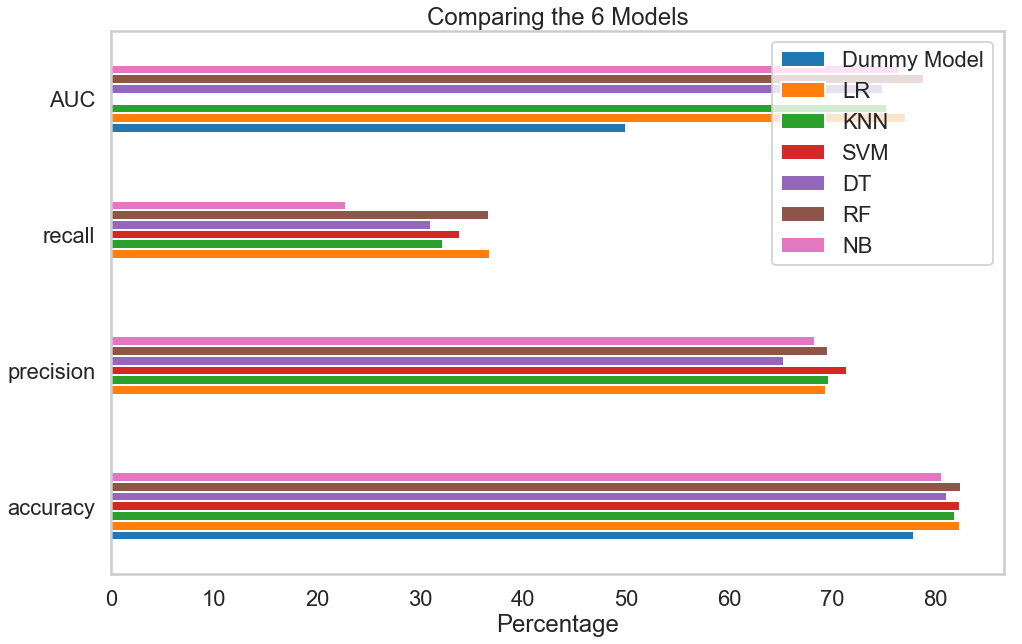

In [50]:
fig, ax = plt.subplots(figsize=(16,10))
actual_metrics.plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage')
ax.set_title('Comparing the 6 Models')
ax.grid();
fig.savefig('comparisons')

In [44]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=lr_cv.predict_proba(X_test)[:,1])
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=y_test, probas_pred=knn_cv.predict_proba(X_test)[:,1])
#precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true=y_test, probas_pred=svm.predict_proba(X_test)[:,1])
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test, probas_pred=dt_cv.predict_proba(X_test)[:,1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test, probas_pred=rf_cv.predict_proba(X_test)[:,1])
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=nb.predict_proba(X_test)[:,1])


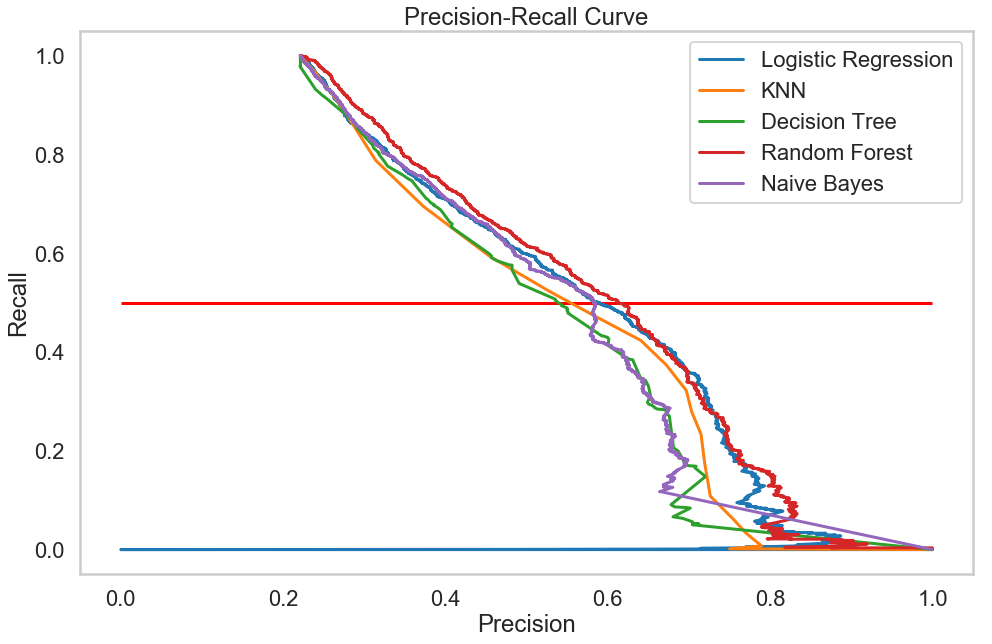

In [49]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(precision_lr, recall_lr, label='Logistic Regression')
ax.plot(precision_knn, recall_knn, label='KNN')
ax.plot(precision_dt, recall_dt, label='Decision Tree')
ax.plot(precision_rf, recall_rf, label='Random Forest')
ax.plot(precision_nb, recall_nb, label='Naive Bayes')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();
fig.savefig('pr_curves')

##### Confusion Matrix for modified Random Forest Classifier

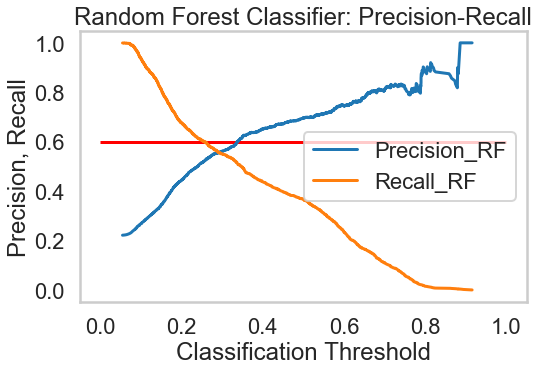

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_rf, precision_rf[1:], label='Precision_RF')
ax.plot(thresholds_rf, recall_rf[1:], label='Recall_RF')
#ax.plot(thresholds_lr, precision_lr[1:], label='Precision_LR')
#ax.plot(thresholds_lr, recall_lr[1:], label='Recall_LR')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Random Forest Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();
fig.savefig('random_forest_pr_curve')

**Classifier with threshold of 0.25**

In [47]:
y_pred_proba = rf_cv.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.25).astype(int)
# Confusion Matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print("Precision: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
print("Accuracy: ", 100*accuracy_score(y_pred=y_pred_test, y_true=y_test))

Conf_Matrix(CM)

Recall:  60.57257659467604
Precision:  51.47247119078106
Accuracy:  78.64444444444445


PREDICTION,pay,default,Total
TRUE,,,
pay,5872,1137,7009
default,785,1206,1991
Total,6657,2343,9000
